<a href="https://colab.research.google.com/github/Jatingpt/Glassdoor-Job-Salary-Prediction-/blob/main/Glassdoor_Job_Salary_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Business Context**

In today's rapidly evolving tech industry, understanding salary trends is crucial for job seekers, employers, and policymakers. Compensation varies significantly based on job roles, company size, experience, and location, making it essential to analyze patterns that impact salary structures.

This project leverages job postings data from Glassdoor.com (2017) to predict salaries for various tech job positions. The dataset includes key features such as job title, company size, and job location, which can be used to identify salary trends, compare roles across industries, and provide valuable insights into compensation expectations.

##**Dataset Description**

The Glassdoor Jobs Dataset contains job postings from Glassdoor.com from 2017-2018. This dataset includes features such as job title, salary estimate, job description, rating, company name, location, headquarters, size, founded, type of ownership, industry, sector, revenue, competitors compile a list of the most important features in this dataset. , hourly wage minima and maxima,, avg_salary,, num_comp,,sdesc_len If you are looking for a job in the data science field then this is the dataset for you to explore!

##**Business Objectives**

For Job Seekers: Helps professionals make informed career decisions by understanding expected salary ranges for different roles.
For Employers: Assists companies in setting competitive salaries to attract and retain top talent.
For Analysts & Researchers: Provides data-driven insights into salary trends based on industry, experience, and geography.
For Recruiters: Aids in benchmarking salaries and ensuring fair compensation practices.

##**Problem Statement**

* How does salary vary by job position (e.g., Data Scientist vs. Software
Engineer vs. DevOps Engineer)?

* What is the impact of company size on salary levels?

* How do salaries differ by location (e.g., San Francisco vs. Austin vs. New York)?

* Can we build a predictive model to estimate salaries based on job attributes?
By analyzing this dataset, we can predict salary ranges, uncover market trends, and provide insights to tech professionals and organizations.

Libraries that have been used in this predictive model :

* Pandas for data manipulation, aggregation

* Matplotlib and Seaborn for visualization and behavior with respect to the target variable. Use at least 5 different visualizations.

* NumPy for computationally efficient operations

* Sklearn for performing different tasks and building model

##**importing libraries**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

##**Loading and exploring the dataset**

In [9]:
file_path = "/content/glassdoor_jobs.csv"
df = pd.read_csv(file_path)
df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [10]:
#shape of the data
df.shape

(956, 15)

In [11]:
#checking if any null values is present.
df.isnull().sum().sum()         #so there is no null values present.

np.int64(0)

In [12]:
df.dtypes

,0
Unnamed: 0,int64
Job Title,object
Salary Estimate,object
Job Description,object
Rating,float64
Company Name,object
Location,object
Headquarters,object
Size,object
Founded,int64


###**Here, the data types of Salary, Revenue, Founded and rating is in object format which should be in proper numeric format**

##**Data Preprocessing**

###**Changing the data types and creating new columns for better understanding of data.**

In [13]:
print('''df["Salary Estimate"].str.extract(r"\$([\d]+)K"):

Regex r"\$([\d]+)K":

\$ → Matches the dollar sign ($).

([\d]+) → Captures one or more digits (i.e., the salary number).

K → Matches the letter "K" (indicating thousands).

This extracts the first numeric value (e.g., 53 from "$53K-$91K")

[0]: Extracts the first match from the extracted data.

.astype(float): Converts the extracted number to float (53.0).

* 1000: Converts 53 to 53000 (converting from "K" to full value).''')

df["Min_Salary"] = df["Salary Estimate"].str.extract(r"\$([\d]+)K")[0].astype(float) * 1000
df["Max_Salary"] = df["Salary Estimate"].str.extract(r"-\$([\d]+)K")[0].astype(float) * 1000
df["Avg_Salary"] = (df["Min_Salary"] + df["Max_Salary"]) / 2  # Calculate average salary

df["Salary Estimate"].str.extract(r"\$([\d]+)K"):

Regex r"\$([\d]+)K":

\$ → Matches the dollar sign ($).

([\d]+) → Captures one or more digits (i.e., the salary number).

K → Matches the letter "K" (indicating thousands).

This extracts the first numeric value (e.g., 53 from "$53K-$91K")

[0]: Extracts the first match from the extracted data.

.astype(float): Converts the extracted number to float (53.0).

* 1000: Converts 53 to 53000 (converting from "K" to full value).


###**Converting Rating and Founded from object dtypes to numeric format**

In [14]:
df["Rating"] = pd.to_numeric(df["Rating"])  # Convert Rating to float
df["Founded"] = pd.to_numeric(df["Founded"])  # Convert Founded to int

###**Converting the object values into categories for optimizing ML preprocessing.**

In [15]:
# Convert "Company Size" to Ordered Category
df["Company Size"] = pd.Categorical(
    df["Size"],
    categories=["1 to 50 employees", "51 to 200 employees", "201 to 500 employees",
                "501 to 1000 employees", "1001 to 5000 employees", "5001 to 10000 employees",
                "10000+ employees"],
    ordered=True
)


In [16]:
#Convert "Industry" and "Sector" to Categorical
df["Industry"] = df["Industry"].astype("category")
df["Sector"] = df["Sector"].astype("category")

In [17]:
df.head(2)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min_Salary,Max_Salary,Avg_Salary,Company Size
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,53000.0,91000.0,72000.0,501 to 1000 employees
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,63000.0,112000.0,87500.0,10000+ employees


In [18]:
print(df.isnull().sum())

Unnamed: 0             0
Job Title              0
Salary Estimate        0
Job Description        0
Rating                 0
Company Name           0
Location               0
Headquarters           0
Size                   0
Founded                0
Type of ownership      0
Industry               0
Sector                 0
Revenue                0
Competitors            0
Min_Salary           238
Max_Salary           238
Avg_Salary           238
Company Size          26
dtype: int64


###**Now, some missing values is present in out data, this happened because The regex fails when the salary format is different or missing. Now, the missing values need to be filled.**

In [19]:
#filling the missing values with the median values.
df["Min_Salary"] = df["Min_Salary"].fillna(df["Min_Salary"].median())
df["Max_Salary"] = df["Max_Salary"].fillna(df["Max_Salary"].median())
df["Avg_Salary"] = df["Avg_Salary"].fillna(df["Avg_Salary"].median())

In [20]:
print(df.isnull().sum())

Unnamed: 0            0
Job Title             0
Salary Estimate       0
Job Description       0
Rating                0
Company Name          0
Location              0
Headquarters          0
Size                  0
Founded               0
Type of ownership     0
Industry              0
Sector                0
Revenue               0
Competitors           0
Min_Salary            0
Max_Salary            0
Avg_Salary            0
Company Size         26
dtype: int64


In [21]:
#filling the missing values of Company Size as well.
df["Company Size"] = df["Company Size"].fillna(df["Company Size"].mode()[0])        #.mode()[0] to extract the most frequent value:

In [22]:
print(df.isnull().sum())

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Min_Salary           0
Max_Salary           0
Avg_Salary           0
Company Size         0
dtype: int64


In [23]:
print(df.dtypes)

Unnamed: 0              int64
Job Title              object
Salary Estimate        object
Job Description        object
Rating                float64
Company Name           object
Location               object
Headquarters           object
Size                   object
Founded                 int64
Type of ownership      object
Industry             category
Sector               category
Revenue                object
Competitors            object
Min_Salary            float64
Max_Salary            float64
Avg_Salary            float64
Company Size         category
dtype: object


###**Deleting the unwanted columns from the table.**

In [24]:
df.drop(columns = ["Unnamed: 0", "Salary Estimate", "Headquarters", "Size", "Company Name", "Competitors"], inplace = True)

In [25]:
df.describe()

,Rating,Founded,Min_Salary,Max_Salary,Avg_Salary
count,956.000000,956.000000,956.000000,956.000000,956.000000
mean,3.601255,1774.605649,74658.995816,129331.589958,101995.292887
std,1.067619,598.942517,26766.956902,38260.992480,32035.267359
min,-1.000000,-1.000000,15000.000000,16000.000000,15500.000000
25%,3.300000,1937.000000,60000.000000,110000.000000,84500.000000
50%,3.800000,1992.000000,71000.000000,126000.000000,98500.000000
75%,4.200000,2008.000000,83250.000000,143000.000000,114000.000000
max,5.000000,2019.000000,202000.000000,306000.000000,254000.000000


In [26]:
#df
df.head(3)

,Job Title,Job Description,Rating,Location,Founded,Type of ownership,Industry,Sector,Revenue,Min_Salary,Max_Salary,Avg_Salary,Company Size
0,Data Scientist,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,"Albuquerque, NM",1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),53000.0,91000.0,72000.0,501 to 1000 employees
1,Healthcare Data Scientist,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,"Linthicum, MD",1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),63000.0,112000.0,87500.0,10000+ employees
2,Data Scientist,"KnowBe4, Inc. is a high growth information sec...",4.8,"Clearwater, FL",2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),80000.0,90000.0,85000.0,501 to 1000 employees


##**Performing EDA**

EDA stands for **“Exploratory Data Analysis"**  EDA is applied to investigate the data and summarize the key insights. It will give you the basic understanding of your data, it’s distribution, null values and much more. You can either explore data using graphs or through some python functions.

The following steps are involved in the process of EDA:

* **Exploring and Visualizing Data**
* **Analyzing relationships between variables**

In [27]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Location', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Min_Salary',
       'Max_Salary', 'Avg_Salary', 'Company Size'],
      dtype='object')

In [28]:
df["Job Title"].unique()

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Data Science Analyst', 'Lead Data Scientist',
       'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science',
       'Business Intelligence Analyst', 'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Dat

In [29]:
grp = df.groupby("Location").agg({"Job Title": "count"})
print(grp)

                  Job Title
Location                   
Agoura Hills, CA          1
Alabaster, AL             1
Alameda, CA               2
Albuquerque, NM           3
Alexandria, VA            5
...                     ...
Winter Park, FL           2
Woburn, MA                1
Woodbridge, NJ            2
Woodinville, WA           1
Worcester, MA             5

[237 rows x 1 columns]


In [30]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Location', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Min_Salary',
       'Max_Salary', 'Avg_Salary', 'Company Size'],
      dtype='object')

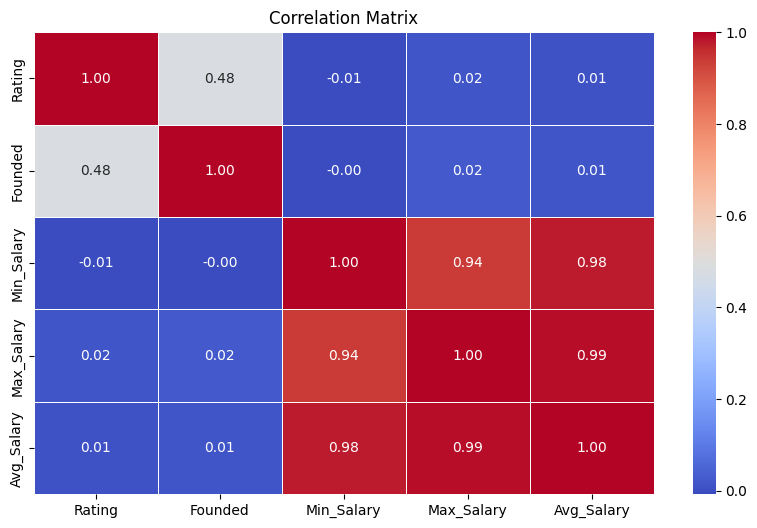

In [31]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [32]:
# Unique values and their counts for categorical features
for col in ['Job Title', 'Industry', 'Sector', 'Company Size']:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())



Column: Job Title
Job Title
Data Scientist                                                       178
Data Engineer                                                         68
Senior Data Scientist                                                 42
Data Analyst                                                          18
Senior Data Engineer                                                  17
                                                                    ... 
Jr. Data Scientist                                                     1
Data Architect / Data Modeler                                          1
Data Scientists                                                        1
Associate Scientist / Sr. Associate Scientist, Antibody Discovery      1
Machine Learning Engineer (NLP)                                        1
Name: count, Length: 328, dtype: int64

Column: Industry
Industry
Biotech & Pharmaceuticals                  148
IT Services                                 77
Computer

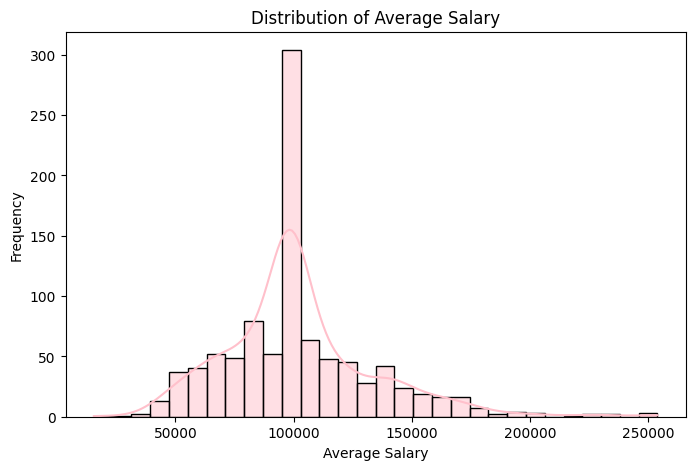

In [33]:
# Histogram for Avg_Salary
plt.figure(figsize=(8, 5))
sns.histplot(df['Avg_Salary'], bins=30, kde=True, color = "pink")
plt.title('Distribution of Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.show()

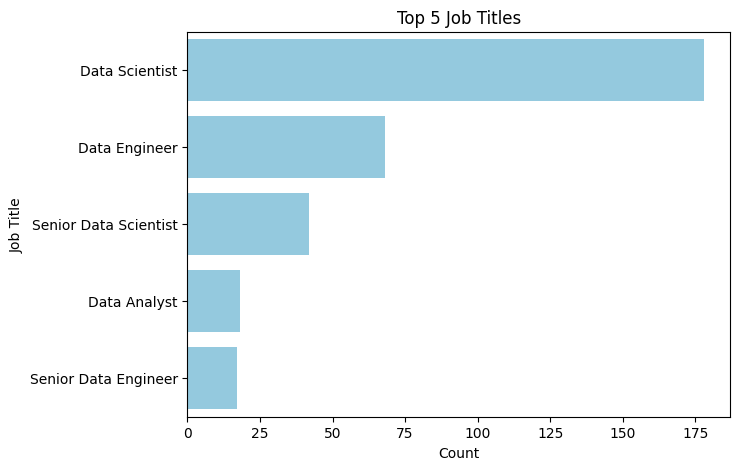

In [34]:
# Bar plot for Job Title
plt.figure(figsize=(7, 5))
sns.countplot(y=df['Job Title'], order=df['Job Title'].value_counts().index[:5],color = "skyblue")
plt.title('Top 5 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()


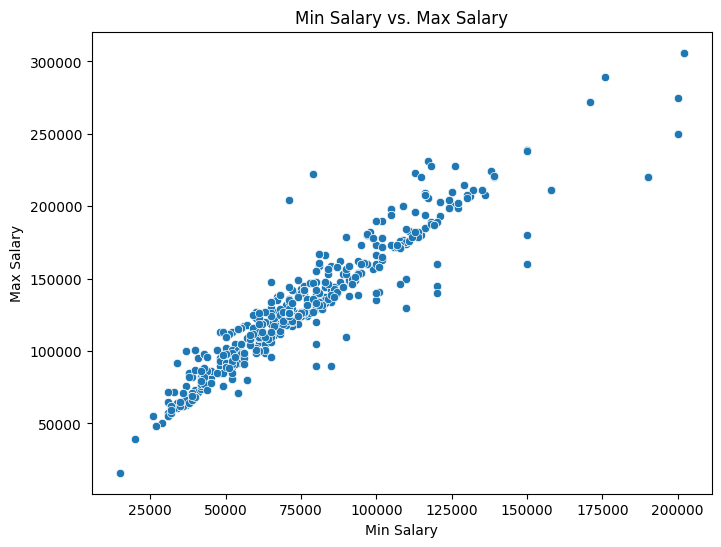

In [35]:
# Scatter plot between Min_Salary and Max_Salary
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Min_Salary'], y=df['Max_Salary'])
plt.title('Min Salary vs. Max Salary')
plt.xlabel('Min Salary')
plt.ylabel('Max Salary')
plt.show()

<ipython-input-37-23b503606f4d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.values, y=location_counts.index, palette='viridis')


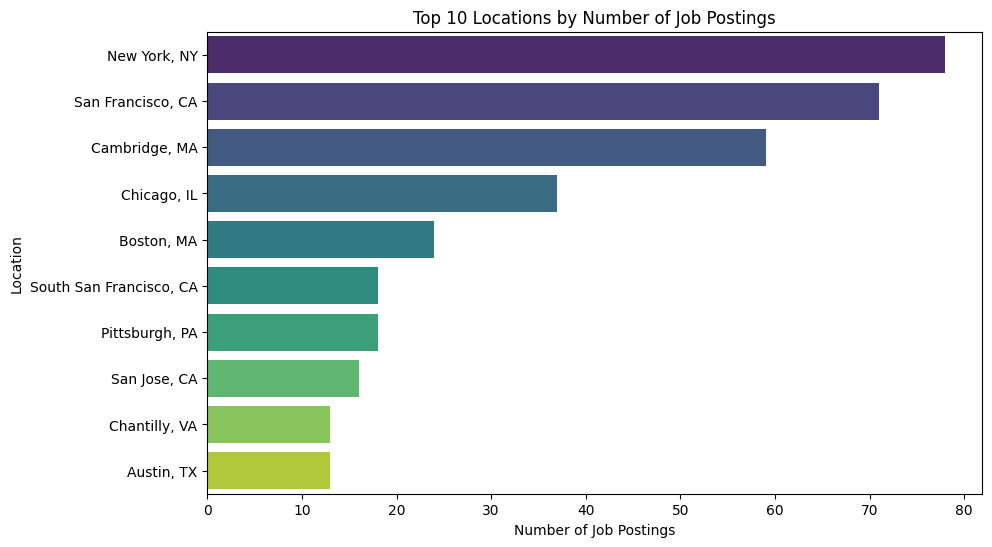

In [37]:
# Count the number of jobs per location
location_counts = df['Location'].value_counts().head(10)  # Display top 10 locations

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.values, y=location_counts.index, palette='viridis')
plt.title('Top 10 Locations by Number of Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Location')
plt.show()

###**Sectorwise job count**

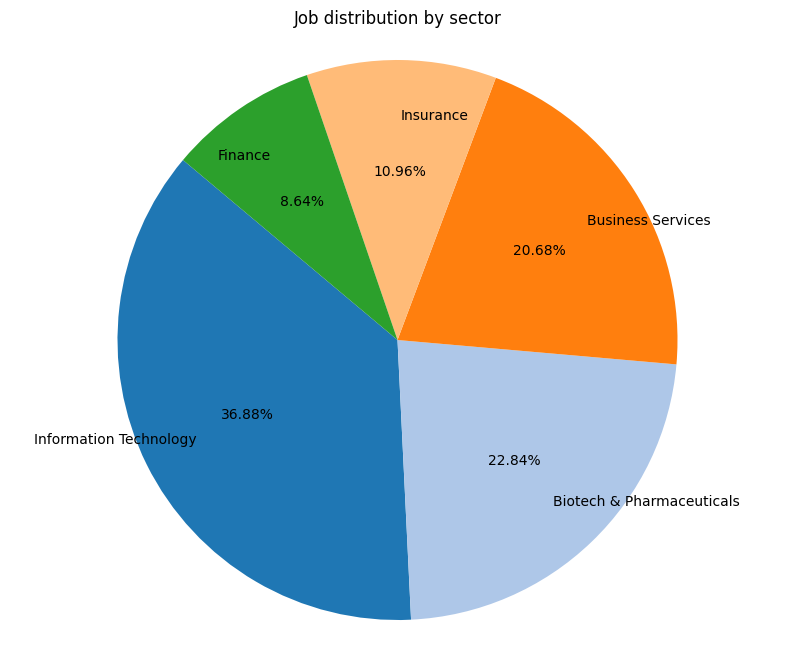

In [53]:
sectors_count = df["Sector"].value_counts().head(5)

plt.figure(figsize=(10,8))
plt.pie(sectors_count, labels = sectors_count.index, autopct = '%1.2f%%', startangle = 140, colors=sns.color_palette('tab20'), labeldistance=0.8)
plt.title("Job distribution by sector")
plt.axis('equal')
plt.show()

####**Encoding Categorical Variables: Convert categorical variables into numerical formats suitable for modeling.**

In [60]:
from sklearn.preprocessing import LabelEncoder

#creating an object for LabelEncoder

le = LabelEncoder()

#encoding the categorical columns and keeping the values in the same columns

df["Job Title"] = le.fit_transform(df['Job Title'])
df["Location"] = le.fit_transform(df['Location'])
df['Company Size'] = le.fit_transform(df['Company Size'])
df['Industry'] = le.fit_transform(df['Industry'])
df['Sector'] = le.fit_transform(df['Sector'])
df['Revenue'] = le.fit_transform(df['Revenue'])
df['Type of ownership'] = le.fit_transform(df['Type of ownership'])

####**Performing Feature Scaling so that we can get the features on the same pitch**

####**Using Standard Scaller**

In [62]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Identify numerical columns
numerical_cols = ['Rating', 'Founded', 'Min_Salary', 'Max_Salary', 'Avg_Salary']

# Scale numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

##**Feature Selection-**

####**Here removing the unimportant features and selecting the important features also spliting the data for target variables like average salary**

In [64]:
#defining x and y variables, where y is the target variable.

x = df.drop(columns=['Avg_Salary', 'Job Description'])

y = df['Avg_Salary']         # Assuming 'Avg_Salary' is the target

In [65]:
x.shape,y.shape

((956, 11), (956,))

##**TrainTest spliting**
####**Spliting the data into training and testing data**

In [67]:
from sklearn.model_selection import train_test_split

#spliting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

##**Model Selection**- e.g Linear Regression, Random Forest Regressor, Decision Tree.

In [69]:
#Linear Regression- Multiple Linear Regression(For more than one feature.)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train,y_train)


LinearRegression()

In [72]:
lr.score(x_train,y_train)*100

100.0

In [70]:
lr.score(x_test,y_test)*100

100.0

In [73]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [76]:
rf.score(x_train,y_train)*100

99.96901653831215

In [75]:
rf.score(x_test,y_test)*100

99.73807866536379

##**Model Evolutuion**

####**Evaluate the model using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²).**

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the testing data set
y_pred = rf.predict(x_test)

#Calculate evalution metrics
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = mse**0.5
r2 = r2_score(y_test,y_pred)

#results from all the metrics

print(f'MAE: {mae}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')

MAE: 0.017424817684386897
MSE: 0.00
RMSE: 0.05
R2: 1.00


##**Hyperparameter Tuning:**

####**Optimizing Model Performance: Use techniques like Grid Search with cross-validation to find the best hyperparameters.**

In [84]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit Grid Search
grid_search.fit(x_train, y_train)

# Best parameters and score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {-grid_search.best_score_:.2f}')

ValueError: Invalid parameter 'max_depth' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Retrieve the best estimator
best_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))
r2 = best_rf.score(x_test, y_test)

# Display the results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mean Absolute Error (MAE): 0.0371
Mean Squared Error (MSE): 0.0077
Root Mean Squared Error (RMSE): 0.0879
R-squared (R²): 0.9918


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid without 'auto' for 'max_features'
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Excluded 'auto'
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, error_score='raise')

# Fit the model
grid_search.fit(x_train, y_train)

# Output the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9969411411810775
